<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Input-Output Operations

In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## Basic I/O with Python

### Writing Objects to Disk

In [2]:
path = './data/'

In [3]:
import numpy as np
from random import gauss

In [4]:
a = [gauss(1.5, 2) for i in range(1000000)]
  # generation of normally distributed randoms

In [5]:
import pickle

In [6]:
pkl_file = open(path + 'data.pkl', 'wb')
  # open file for writing
  # Note: existing file might be overwritten

In [7]:
%time pickle.dump(a, pkl_file)

CPU times: user 28.9 ms, sys: 16.2 ms, total: 45.1 ms
Wall time: 47.1 ms


In [8]:
pkl_file

<_io.BufferedWriter name='./data/data.pkl'>

In [9]:
pkl_file.close()

In [10]:
ll $path*

-rw-r--r--  1 yves  staff  9002006 Jul 11 19:24 ./data/data.pkl


In [11]:
pkl_file = open(path + 'data.pkl', 'rb')  # open file for reading

In [12]:
%time b = pickle.load(pkl_file)

CPU times: user 38.3 ms, sys: 17.1 ms, total: 55.4 ms
Wall time: 54.5 ms


In [13]:
b[:5]

[1.5813082379445325,
 0.9192598683321738,
 3.7100676459300796,
 -0.9765261419398472,
 4.150286766991373]

In [14]:
a[:5]

[1.5813082379445325,
 0.9192598683321738,
 3.7100676459300796,
 -0.9765261419398472,
 4.150286766991373]

In [15]:
np.allclose(np.array(a), np.array(b))

True

In [16]:
np.sum(np.array(a) - np.array(b))

0.0

In [17]:
pkl_file = open(path + 'data.pkl', 'wb')  # open file for writing

In [18]:
%time pickle.dump(np.array(a), pkl_file)

CPU times: user 29.3 ms, sys: 9.85 ms, total: 39.2 ms
Wall time: 40.1 ms


In [19]:
%time pickle.dump(np.array(a) ** 2, pkl_file)

CPU times: user 29.7 ms, sys: 9.38 ms, total: 39.1 ms
Wall time: 41.2 ms


In [20]:
pkl_file.close()

In [21]:
ll $path*

-rw-r--r--@ 1 yves  staff  16000322 Jul 11 19:24 ./data/data.pkl


In [22]:
pkl_file = open(path + 'data.pkl', 'rb')  # open file for reading

In [23]:
x = pickle.load(pkl_file)
x

array([ 1.58130824,  0.91925987,  3.71006765, ...,  0.73691494,
       -0.5657071 , -1.08112831])

In [24]:
y = pickle.load(pkl_file)
y

array([  2.50053574,   0.84503871,  13.76460194, ...,   0.54304363,
         0.32002453,   1.16883843])

In [25]:
pkl_file.close()


In [26]:
pkl_file = open(path + 'data.pkl', 'wb')  # open file for writing
pickle.dump({'x' : x, 'y' : y}, pkl_file)
pkl_file.close()

In [27]:
pkl_file = open(path + 'data.pkl', 'rb')  # open file for writing
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])

x [ 1.58130824  0.91925987  3.71006765 -0.97652614]
y [  2.50053574   0.84503871  13.76460194   0.95360331]


In [28]:
!rm -f $path*

### Reading and Writing Text Files

In [29]:
rows = 5000
a = np.random.standard_normal((rows, 5))  # dummy data

In [30]:
a.round(4)

array([[-0.7929, -0.62  ,  0.8475, -0.5192,  0.7105],
       [ 0.2488,  0.0757,  0.8963,  1.2235, -0.5837],
       [ 0.2941, -0.2285,  0.6601, -0.3957, -0.3484],
       ..., 
       [ 0.605 ,  1.4742,  0.0145, -0.2643, -1.2351],
       [-1.3713,  1.0346, -0.5478, -2.9575,  1.0338],
       [-0.9185,  2.2894, -0.1826, -0.8405,  0.4973]])

In [31]:
import pandas as pd
t = pd.date_range(start='2014/1/1', periods=rows, freq='H')
    # set of hourly datetime objects

In [32]:
t

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-07-27 22:00:00', '2014-07-27 23:00:00',
               '2014-07-28 00:00:00', '2014-07-28 01:00:00',
               '2014-07-28 02:00:00', '2014-07-28 03:00:00',
               '2014-07-28 04:00:00', '2014-07-28 05:00:00',
               '2014-07-28 06:00:00', '2014-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [33]:
csv_file = open(path + 'data.csv', 'w')  # open file for writing

In [34]:
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

25

In [35]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = '%s,%f,%f,%f,%f,%f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()

In [36]:
ll $path*

-rw-r--r--@ 1 yves  staff  337462 Jul 11 19:24 ./data/data.csv


In [37]:
csv_file = open(path + 'data.csv', 'r')  # open file for reading

In [38]:
for i in range(5):
    print(csv_file.readline(), end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-0.792854,-0.619980,0.847537,-0.519209,0.710493
2014-01-01 01:00:00,0.248792,0.075653,0.896322,1.223483,-0.583715
2014-01-01 02:00:00,0.294116,-0.228455,0.660129,-0.395653,-0.348395
2014-01-01 03:00:00,0.458356,-0.646949,1.601538,1.342564,-0.970662


In [39]:
csv_file = open(path + 'data.csv', 'r')
content = csv_file.readlines()
for line in content[:5]:
    print(line, end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-0.792854,-0.619980,0.847537,-0.519209,0.710493
2014-01-01 01:00:00,0.248792,0.075653,0.896322,1.223483,-0.583715
2014-01-01 02:00:00,0.294116,-0.228455,0.660129,-0.395653,-0.348395
2014-01-01 03:00:00,0.458356,-0.646949,1.601538,1.342564,-0.970662


In [40]:
csv_file.close()
!rm -f $path*

### SQL Databases

In [41]:
import sqlite3 as sq3

In [42]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'

In [43]:
con = sq3.connect(path + 'numbs.db')

In [44]:
con.execute(query)

In [45]:
con.commit()

In [46]:
import datetime as dt

In [47]:
con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
            (dt.datetime.now(), 0.12, 7.3))

In [48]:
data = np.random.standard_normal((10000, 2)).round(5)

In [49]:
for row in data:
    con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
                (dt.datetime.now(), row[0], row[1]))
con.commit()

In [50]:
con.execute('SELECT * FROM numbs').fetchmany(10)

[('2017-07-11 19:24:36.571687', 0.12, 7.3),
 ('2017-07-11 19:24:36.588493', 0.67521, 2.22351),
 ('2017-07-11 19:24:36.588669', -1.58142, 0.49044),
 ('2017-07-11 19:24:36.589006', -0.56616, 0.67062),
 ('2017-07-11 19:24:36.589053', -0.9821, -0.0853),
 ('2017-07-11 19:24:36.589085', -0.59685, 1.62893),
 ('2017-07-11 19:24:36.589112', 1.17338, 0.91411),
 ('2017-07-11 19:24:36.589138', -0.05043, 0.22621),
 ('2017-07-11 19:24:36.589164', 0.93674, -1.25059),
 ('2017-07-11 19:24:36.589196', 0.67116, -1.02751)]

In [51]:
pointer = con.execute('SELECT * FROM numbs')

In [52]:
for i in range(3):
    print(pointer.fetchone())

('2017-07-11 19:24:36.571687', 0.12, 7.3)
('2017-07-11 19:24:36.588493', 0.67521, 2.22351)
('2017-07-11 19:24:36.588669', -1.58142, 0.49044)


In [53]:
con.close()
!rm -f $path*

### Writing and Reading Numpy Arrays

In [54]:
import numpy as np

In [55]:
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00',
                  dtype='datetime64[m]')  # minute intervals
len(dtimes)

3681360

In [56]:
dty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')])
data = np.zeros(len(dtimes), dtype=dty)

In [57]:
data['Date'] = dtimes

In [58]:
a = np.random.standard_normal((len(dtimes), 2)).round(5)
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

In [59]:
%time np.save(path + 'array', data)  # suffix .npy is added

CPU times: user 3.32 ms, sys: 79.3 ms, total: 82.6 ms
Wall time: 107 ms


In [60]:
ll $path*

-rw-r--r--@ 1 yves  staff  58901888 Jul 11 19:24 ./data/array.npy


In [61]:
%time np.load(path + 'array.npy')

CPU times: user 1.39 ms, sys: 40 ms, total: 41.4 ms
Wall time: 40.2 ms


array([('2015-01-01T10:00', -1.38248003, -0.28341001),
       ('2015-01-01T10:01',  0.67870998,  1.06499004),
       ('2015-01-01T10:02', -0.14802   , -1.44578004), ...,
       ('2021-12-31T21:57', -0.12662999, -0.24617   ),
       ('2021-12-31T21:58', -0.63775003,  1.00996006),
       ('2021-12-31T21:59', -0.86041999,  0.29769   )], 
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [62]:
data = np.random.standard_normal((10000, 6000))

In [63]:
%time np.save(path + 'array', data) 

CPU times: user 19.2 ms, sys: 715 ms, total: 735 ms
Wall time: 915 ms


In [64]:
ll $path*

-rw-r--r--@ 1 yves  staff  480000080 Jul 11 19:24 ./data/array.npy


In [65]:
%time np.load(path + 'array.npy')

CPU times: user 2.04 ms, sys: 364 ms, total: 366 ms
Wall time: 416 ms


array([[-0.62730019,  0.63252153,  1.22342673, ...,  1.70087043,
        -0.52810726,  3.55379827],
       [ 1.54469834, -2.31620784, -0.55828205, ..., -0.46300363,
         0.59634956,  0.44328108],
       [ 1.67423933, -0.18770715,  1.29603116, ...,  1.49600273,
         0.07844717, -0.30727444],
       ..., 
       [ 0.24738437, -0.7770159 ,  0.7798589 , ...,  0.99153845,
        -0.71107897,  1.98402943],
       [ 0.46811265, -0.15186199,  1.12835116, ..., -1.31180584,
         0.23748513, -0.17828889],
       [ 0.86075089, -0.0642047 ,  0.91020838, ...,  0.73393964,
         1.19065575, -1.1131835 ]])

In [66]:
data = 0.0
!rm -f $path*

## I/O with pandas

In [67]:
import numpy as np
import pandas as pd
data = np.random.standard_normal((1000000, 5)).round(5)
        # sample data set

In [68]:
filename = path + 'numbs'

### SQL Database

In [69]:
import sqlite3 as sq3

In [70]:
query = 'CREATE TABLE numbers (No1 real, No2 real,\
        No3 real, No4 real, No5 real)'

In [71]:
con = sq3.Connection(filename + '.db')

In [72]:
con.execute(query)

In [73]:
%%time
con.executemany('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

CPU times: user 9.93 s, sys: 156 ms, total: 10.1 s
Wall time: 10.2 s


In [74]:
ll $path*

-rw-r--r--@ 1 yves  staff  52633600 Jul 11 19:24 ./data/numbs.db


In [75]:
%%time
temp = con.execute('SELECT * FROM numbers').fetchall()
print(temp[:2])
temp = 0.0

[(-0.88408, -0.67193, 0.21988, 0.98507, 1.55431), (0.90875, 0.03152, -1.53419, -1.89065, -1.04942)]
CPU times: user 2.27 s, sys: 186 ms, total: 2.45 s
Wall time: 2.48 s


In [76]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(con.execute(query).fetchall()).round(3)

CPU times: user 932 ms, sys: 76.4 ms, total: 1.01 s
Wall time: 1.02 s


(-4.5, 0.5)

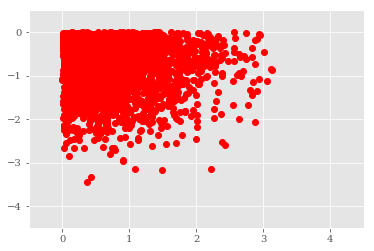

In [77]:
res = res[::100]  # every 100th result
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(res[:, 0], res[:, 1], 'ro')
plt.grid(True); plt.xlim(-0.5, 4.5); plt.ylim(-4.5, 0.5)
# tag: scatter_query
# title: Plot of the query result
# size: 60

### From SQL to pandas

In [78]:
import pandas.io.sql as pds

In [79]:
%time data = pds.read_sql('SELECT * FROM numbers', con)

CPU times: user 2.53 s, sys: 211 ms, total: 2.74 s
Wall time: 2.75 s


In [80]:
data.head()

,No1,No2,No3,No4,No5
0,-0.88408,-0.67193,0.21988,0.98507,1.55431
1,0.90875,0.03152,-1.53419,-1.89065,-1.04942
2,-0.60897,1.02683,-0.11410,-1.27569,-0.53105
3,-0.71535,-1.36038,0.47428,0.46067,0.28668
4,-0.50174,0.12631,0.37005,-1.19631,0.42194


In [81]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

CPU times: user 15.1 ms, sys: 8.72 ms, total: 23.8 ms
Wall time: 22.8 ms


,No1,No2,No3,No4,No5
6,0.74537,-1.55504,0.08551,-1.31818,-0.68557
7,1.96624,-0.73706,-0.23955,1.07729,-0.95363
11,0.86470,-1.00699,0.90820,1.22874,-0.59756
18,0.46781,-1.14707,1.13981,1.34149,-0.35235
21,1.14172,-0.73225,-0.12791,0.85845,-2.43854


In [82]:
%%time
res = data[['No1', 'No2']][((data['No1'] > 0.5) | (data['No1'] < -0.5))
                     & ((data['No2'] < -1) | (data['No2'] > 1))]

CPU times: user 15.2 ms, sys: 8.7 ms, total: 23.9 ms
Wall time: 22.5 ms


(-4.8161509999999996,
 4.7147109999999994,
 -5.1051124999999997,
 5.2749825000000001)

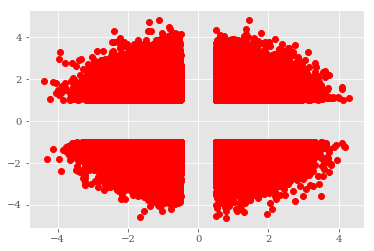

In [83]:
plt.plot(res.No1, res.No2, 'ro')
plt.grid(True); plt.axis('tight')
# tag: data_scatter_1
# title: Scatter plot of complex query results
# size: 55

In [84]:
h5s = pd.HDFStore(filename + '.h5s', 'w')

In [85]:
%time h5s['data'] = data

CPU times: user 39.2 ms, sys: 56.9 ms, total: 96.1 ms
Wall time: 133 ms


In [86]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: ./data/numbs.h5s
/data            frame        (shape->[1000000,5])

In [87]:
h5s.close()

In [88]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')
temp = h5s['data']
h5s.close()

CPU times: user 5.54 ms, sys: 19.7 ms, total: 25.2 ms
Wall time: 24.1 ms


In [89]:
np.allclose(np.array(temp), np.array(data))

True

In [90]:
temp = 0.0

In [91]:
ll $path*

-rw-r--r--@ 1 yves  staff  52633600 Jul 11 19:24 ./data/numbs.db
-rw-r--r--@ 1 yves  staff  48007192 Jul 11 19:24 ./data/numbs.h5s


### Data as CSV File

In [92]:
%time data.to_csv(filename + '.csv')

CPU times: user 6.43 s, sys: 257 ms, total: 6.68 s
Wall time: 6.73 s


In [93]:
ls data/

numbs.csv  numbs.db   numbs.h5s


CPU times: user 1.25 s, sys: 151 ms, total: 1.41 s
Wall time: 1.41 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fe306a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1101eb9b0>]], dtype=object)

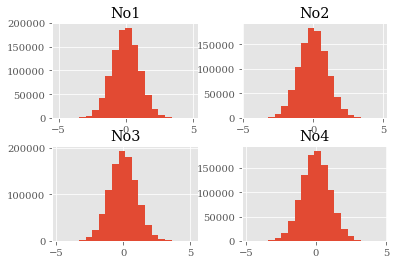

In [94]:
%%time
pd.read_csv(filename + '.csv')[['No1', 'No2',
                                'No3', 'No4']].hist(bins=20)
# tag: data_hist_3
# title: Histogram of 4 data sets
# size: 60

### Data as Excel File

In [95]:
%time data[:100000].to_excel(filename + '.xlsx')

CPU times: user 28.3 s, sys: 647 ms, total: 29 s
Wall time: 29.2 s


CPU times: user 6.17 s, sys: 91.2 ms, total: 6.27 s
Wall time: 6.28 s


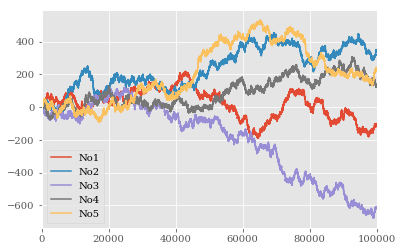

In [96]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot()
# tag: data_paths
# title: Paths of random data from Excel file
# size: 60

In [97]:
ll $path*

-rw-r--r--@ 1 yves  staff  48833731 Jul 11 19:25 ./data/numbs.csv
-rw-r--r--@ 1 yves  staff  52633600 Jul 11 19:24 ./data/numbs.db
-rw-r--r--@ 1 yves  staff  48007192 Jul 11 19:24 ./data/numbs.h5s
-rw-r--r--@ 1 yves  staff   4371165 Jul 11 19:25 ./data/numbs.xlsx


In [98]:
rm -f $path*

## Fast I/O with PyTables

In [99]:
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### Working with Tables

In [100]:
filename = path + 'tab.h5'
h5 = tb.open_file(filename, 'w') 

In [101]:
rows = 2000000

In [102]:
row_des = {
    'Date': tb.StringCol(26, pos=1),
    'No1': tb.IntCol(pos=2),
    'No2': tb.IntCol(pos=3),
    'No3': tb.Float64Col(pos=4),
    'No4': tb.Float64Col(pos=5)
    }

In [103]:
filters = tb.Filters(complevel=0)  # no compression
tab = h5.create_table('/', 'ints_floats', row_des,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)

In [104]:
tab

/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [105]:
pointer = tab.row

In [106]:
ran_int = np.random.randint(0, 10000, size=(rows, 2))
ran_flo = np.random.standard_normal((rows, 2)).round(5)

In [107]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i, 0]
    pointer['No2'] = ran_int[i, 1] 
    pointer['No3'] = ran_flo[i, 0]
    pointer['No4'] = ran_flo[i, 1] 
    pointer.append()
      # this appends the data and
      # moves the pointer one row forward
tab.flush()

CPU times: user 7.43 s, sys: 102 ms, total: 7.53 s
Wall time: 7.56 s


In [108]:
tab

/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [109]:
ll $path*

-rw-r--r--@ 1 yves  staff  100156248 Jul 11 19:25 ./data/tab.h5


In [110]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'),
                                 ('No3', '<f8'), ('No4', '<f8')])
sarray = np.zeros(len(ran_int), dtype=dty)

In [111]:
sarray

array([(b'', 0, 0,  0.,  0.), (b'', 0, 0,  0.,  0.), (b'', 0, 0,  0.,  0.),
       ..., (b'', 0, 0,  0.,  0.), (b'', 0, 0,  0.,  0.),
       (b'', 0, 0,  0.,  0.)], 
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [112]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_flo[:, 0]
sarray['No4'] = ran_flo[:, 1]

CPU times: user 67.2 ms, sys: 26.8 ms, total: 94 ms
Wall time: 93.5 ms


In [113]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)

CPU times: user 22 ms, sys: 30.8 ms, total: 52.7 ms
Wall time: 52.9 ms


/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [114]:
h5

File(filename=./data/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [115]:
h5.remove_node('/', 'ints_floats_from_array')

In [116]:
tab[:3]

array([(b'2017-07-11 19:25:45.660402', 6744, 6234, -0.56336, -1.05424),
       (b'2017-07-11 19:25:45.662437',  930, 5667, -0.2922 ,  2.54632),
       (b'2017-07-11 19:25:45.662454', 4818, 4357,  0.17039, -1.28391)], 
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [117]:
tab[:4]['No4']

array([-1.05424,  2.54632, -1.28391, -0.6004 ])

In [118]:
%time np.sum(tab[:]['No3'])

CPU times: user 34.6 ms, sys: 63.5 ms, total: 98.1 ms
Wall time: 94.1 ms


-1393.5126900000007

In [119]:
%time np.sum(np.sqrt(tab[:]['No1']))

CPU times: user 35 ms, sys: 48 ms, total: 83 ms
Wall time: 82 ms


133258219.09518963

2000000
CPU times: user 171 ms, sys: 103 ms, total: 274 ms
Wall time: 273 ms


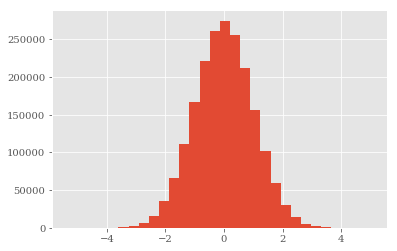

In [120]:
%%time
plt.hist(tab[:]['No3'], bins=30)
plt.grid(True)
print(len(tab[:]['No3']))
# tag: data_hist
# title: Histogram of data
# size: 60

In [121]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
        tab.where('((No3 < -0.5) | (No3 > 0.5)) \
                 & ((No4 < -1) | (No4 > 1))')])[::100]

CPU times: user 288 ms, sys: 95.2 ms, total: 383 ms
Wall time: 328 ms


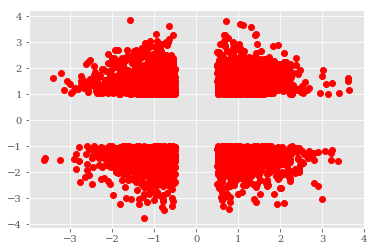

In [122]:
plt.plot(res.T[0], res.T[1], 'ro')
plt.grid(True)
# tag: scatter_data
# title: Scatter plot of query result
# size: 70

In [123]:
%%time
values = tab.cols.No3[:]
print("Max %18.3f" % values.max())
print("Ave %18.3f" % values.mean())
print("Min %18.3f" % values.min())
print("Std %18.3f" % values.std())

Max              5.054
Ave             -0.001
Min             -5.337
Std              1.000
CPU times: user 24.5 ms, sys: 30.5 ms, total: 55 ms
Wall time: 53.9 ms


In [124]:
%%time
results = [(row['No1'], row['No2']) for row in
           tab.where('((No1 > 9800) | (No1 < 200)) \
                    & ((No2 > 4500) & (No2 < 5500))')]
for res in results[:4]:
    print(res)

(9909, 4637)
(9918, 4986)
(9854, 5173)
(132, 4860)
CPU times: user 54.8 ms, sys: 46.6 ms, total: 101 ms
Wall time: 56.6 ms


In [125]:
%%time
results = [(row['No1'], row['No2']) for row in
           tab.where('(No1 == 1234) & (No2 > 9776)')]
for res in results:
    print(res)

(1234, 9994)
(1234, 9997)
(1234, 9921)
(1234, 9902)
(1234, 9975)
(1234, 9970)
CPU times: user 28 ms, sys: 44.7 ms, total: 72.6 ms
Wall time: 51.7 ms


### Working with Compressed Tables

In [126]:
filename = path + 'tab.h5c'
h5c = tb.open_file(filename, 'w') 

In [127]:
filters = tb.Filters(complevel=4, complib='blosc')

In [128]:
tabc = h5c.create_table('/', 'ints_floats', sarray,
                        title='Integers and Floats',
                      expectedrows=rows, filters=filters)

In [129]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
             tabc.where('((No3 < -0.5) | (No3 > 0.5)) \
                       & ((No4 < -1) | (No4 > 1))')])[::100]

CPU times: user 326 ms, sys: 93 ms, total: 419 ms
Wall time: 383 ms


In [130]:
%time arr_non = tab.read()

CPU times: user 27.7 ms, sys: 54.2 ms, total: 81.9 ms
Wall time: 85.3 ms


In [131]:
%time arr_com = tabc.read()

CPU times: user 30.7 ms, sys: 66.3 ms, total: 97 ms
Wall time: 106 ms


In [132]:
ll $path*

-rw-r--r--@ 1 yves  staff  200312336 Jul 11 19:25 ./data/tab.h5
-rw-r--r--@ 1 yves  staff  100030828 Jul 11 19:25 ./data/tab.h5c


In [133]:
h5c.close()

### Working with Arrays

In [134]:
%%time
arr_int = h5.create_array('/', 'integers', ran_int)
arr_flo = h5.create_array('/', 'floats', ran_flo)

CPU times: user 1.91 ms, sys: 27.9 ms, total: 29.8 ms
Wall time: 49.5 ms


In [135]:
h5

File(filename=./data/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(2000000, 2)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/integers (Array(2000000, 2)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [136]:
ll $path*

-rw-r--r--@ 1 yves  staff  262344490 Jul 11 19:25 ./data/tab.h5
-rw-r--r--@ 1 yves  staff  100030828 Jul 11 19:25 ./data/tab.h5c


In [137]:
h5.close()

In [138]:
!rm -f $path*

### Out-of-Memory Computations

In [139]:
filename = path + 'array.h5'
h5 = tb.open_file(filename, 'w') 

In [140]:
n = 100
ear = h5.create_earray(h5.root, 'ear',
                      atom=tb.Float64Atom(),
                      shape=(0, n))

In [141]:
%%time
rand = np.random.standard_normal((n, n))
for i in range(750):
    ear.append(rand)
ear.flush()

CPU times: user 32.8 ms, sys: 31 ms, total: 63.9 ms
Wall time: 85.4 ms


In [142]:
ear

/ear (EArray(75000, 100)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (81, 100)

In [143]:
ear.size_on_disk

60004800

In [144]:
out = h5.create_earray(h5.root, 'out',
                      atom=tb.Float64Atom(),
                      shape=(0, n))

In [145]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')
  # the numerical expression as a string object
expr.set_output(out, append_mode=True)
  # target to store results is disk-based array

In [146]:
%time expr.eval()
  # evaluation of the numerical expression
  # and storage of results in disk-based array

CPU times: user 108 ms, sys: 56.4 ms, total: 164 ms
Wall time: 85.1 ms


/out (EArray(75000, 100)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (81, 100)

In [147]:
out[0, :10]

array([-1.73445971, -1.05585149,  1.56059227,  2.3874537 ,  0.07813273,
        3.71036343,  0.28509721, -1.49786669, -0.2213879 ,  1.70499567])

In [148]:
%time imarray = ear.read()
  # read whole array into memory

CPU times: user 20.1 ms, sys: 32.2 ms, total: 52.3 ms
Wall time: 51.8 ms


In [149]:
import numexpr as ne
expr = '3 * sin(imarray) + sqrt(abs(imarray))'

In [150]:
ne.set_num_threads(16)
%time ne.evaluate(expr)[0, :10]

CPU times: user 101 ms, sys: 64.2 ms, total: 165 ms
Wall time: 33.7 ms


array([-1.73445971, -1.05585149,  1.56059227,  2.3874537 ,  0.07813273,
        3.71036343,  0.28509721, -1.49786669, -0.2213879 ,  1.70499567])

In [151]:
h5.close()

In [152]:
!rm -f $path*

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>